In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat data dari file CSV
file_path = 'ready-merge.csv'
data = pd.read_csv(file_path)

data.head()

,kota,jamCuaca,kodeCuaca,humidity,tempC,tempF,iqa,wind_dir_deg,wind_spd_km_h,pressure_mbar
0,Ambon,2023-11-20 00:00:00,3,80,29.0,84.0,47,174,7.4,1010
1,Ambon,2023-11-20 06:00:00,3,65,32.0,90.0,52,174,11.1,1011
2,Ambon,2023-11-20 12:00:00,1,80,28.0,82.0,54,174,18.4,1009
3,Ambon,2023-11-20 18:00:00,1,95,24.0,75.0,51,174,12.8,1010
4,Badung,2023-11-20 00:00:00,3,85,28.0,82.0,69,184,3.7,1012


## Pengaruh Variabel Cuaca terhadap Kualitas Udara:

In [8]:
import statsmodels.api as sm

# Pisahkan variabel prediktor (cuaca) dan target (iqa)
X = data[['tempC', 'humidity', 'wind_dir_deg', 'wind_spd_km_h', 'pressure_mbar']]
y = data['iqa']

# Tambahkan konstanta ke variabel prediktor
X = sm.add_constant(X)

# Buat model regresi linear
model = sm.OLS(y, X).fit()

# Tampilkan hasil ringkasan model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    iqa   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     40.73
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           9.28e-41
Time:                        01:38:44   Log-Likelihood:                -14851.
No. Observations:                3240   AIC:                         2.971e+04
Df Residuals:                    3234   BIC:                         2.975e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2171.3172    209.487     10.365

## Perbandingan Rata-rata atau Distribusi:

### Uji T Independen

In [9]:
from scipy.stats import ttest_ind

# Misalnya, kita ingin membandingkan variabel 'tempC' antara kelompok IQA rendah dan tinggi
group_low_iqa = data[data['iqa'] < 35.5]  # Tentukan batas untuk kelompok IQA rendah
group_high_iqa = data[data['iqa'] >= 35.5]  # Kelompok IQA tinggi

# Lakukan uji t-independen untuk variabel 'tempC' antara dua kelompok IQA
t_stat, p_value = ttest_ind(group_low_iqa['tempC'], group_high_iqa['tempC'])

# Tampilkan hasil
if p_value < 0.05:  # Ubah nilai alpha sesuai kebutuhan
    print("Terdapat perbedaan signifikan antara rata-rata variabel 'tempC' pada dua kelompok IQA.")
else:
    print("Tidak ada perbedaan signifikan antara rata-rata variabel 'tempC' pada dua kelompok IQA.")


Terdapat perbedaan signifikan antara rata-rata variabel 'tempC' pada dua kelompok IQA.


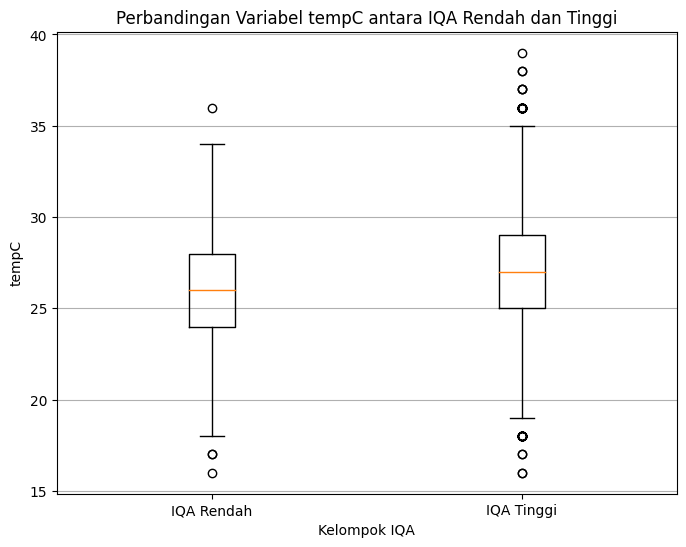

In [10]:
import matplotlib.pyplot as plt

# Buat boxplot untuk kelompok IQA rendah dan tinggi pada variabel 'tempC'
plt.figure(figsize=(8, 6))
plt.boxplot([group_low_iqa['tempC'], group_high_iqa['tempC']], labels=['IQA Rendah', 'IQA Tinggi'])
plt.title('Perbandingan Variabel tempC antara IQA Rendah dan Tinggi')
plt.xlabel('Kelompok IQA')
plt.ylabel('tempC')
plt.grid(axis='y')
plt.show()
